## Problem 1:

##### You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

Data Ingestion: 11 marks
1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)
1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

Data Preparation: 4 marks
1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

Modeling: 22 marks
1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)
1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)
1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)
1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)


Inference: 5 marks
1.8 Based on these predictions, what are the insights? (5 marks)

**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.
<!-- ![image.png](attachment:image.png) -->

### 1.1 Data Ingestion:

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks) 

In [329]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [330]:
os.getcwd()

'C:\\Users\\612598\\OneDrive - Cognizant\\Desktop\\Great Learning\\Machine Learning\\Assignment'

In [331]:
os.chdir("C:\\Users\\612598\\OneDrive - Cognizant\\Desktop\\Great Learning\\Machine Learning\\Assignment")

In [332]:
os.getcwd()

'C:\\Users\\612598\\OneDrive - Cognizant\\Desktop\\Great Learning\\Machine Learning\\Assignment'

In [333]:
# Read the Dataset
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [334]:
# Read the first five rows of the Data
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [107]:
# Read the last five lines of the given data
df.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


In [108]:
# Description of whole data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# In above description we can see mean values and 50% are almost same, mean and median are almost Coherent.
# Gender and vote seems to be Categorical Nominal variables, where order is not important aspect
# All other variables are Categorical Ordinal Variables, Ratings
# All features seems to be somewhat equally distributed around mean.

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [111]:
# we can see gender and vote are of Object Datatype, we will try to convert it into integer Data type further.
# Total 1525 datapoints are there, 1525 different people, No null value can be detected here.

In [112]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [113]:
# 0 Null values in all variables can be seen

In [114]:
# drop the unnecessary feature Unnamed: 0 
df=df.drop('Unnamed: 0',axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [115]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [116]:
# no. of duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df.shape

Number of duplicate rows = 8


(1525, 9)

In [117]:
# Here we can see there are 8 rows which are duplicates, we will dig deeper into it

In [118]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [119]:
df[dups]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [120]:
# Here we can see all mentioned duplicate rows, have different age mentioned, so this can be different personalities from each other.so we will keep it instead of removing.

 ### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

### Univariate Analysis

Text(0.5, 1.0, 'Age_boxplot')

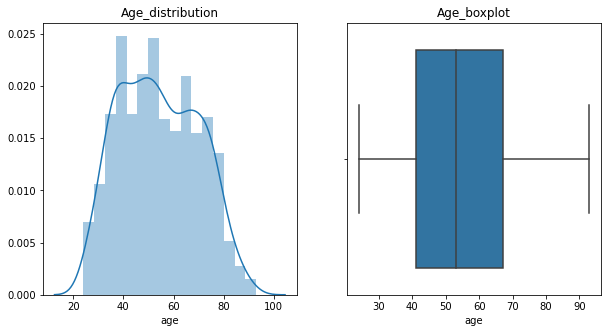

In [121]:
# plot the graph for Age variable
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Age_distribution')
sns.distplot(df['age'])

plt.subplot(1,2,2)
sns.boxplot(df['age'])
plt.title('Age_boxplot')

In [122]:
# It seems that Age is normally distibuted and not much skewed, all age groups are covered, it has no outliers as well

Text(0.5, 1.0, 'Economic Condition national boxplot')

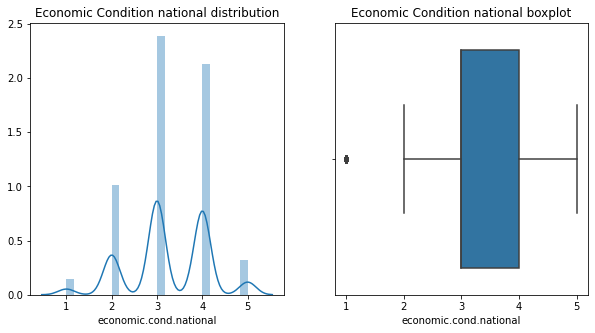

In [123]:
# plot the graph for Economic Condition national variable
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Economic Condition national distribution')
sns.distplot(df['economic.cond.national'])

plt.subplot(1,2,2)
sns.boxplot(df['economic.cond.national'])
plt.title('Economic Condition national boxplot')

In [124]:
# In above plot we can see spikes at almost every rating, but even this is showing most people has given 3 ratings.very less people have given 1 and 5 rating, from this we can say that this particular nation neither have great economical condition nor poor condition.

Text(0.5, 1.0, 'Economic Condition national boxplot')

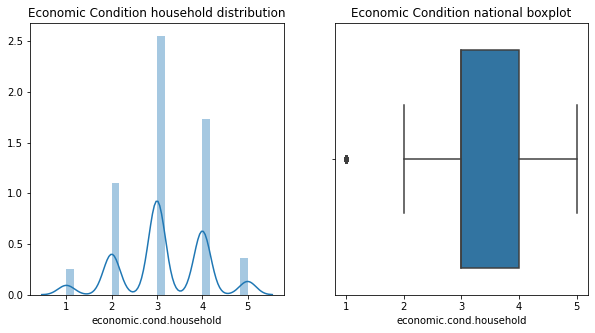

In [125]:
# plot the graph for Economic Condition household variable
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Economic Condition household distribution')
sns.distplot(df['economic.cond.household'])

plt.subplot(1,2,2)
sns.boxplot(df['economic.cond.household'])
plt.title('Economic Condition national boxplot')

In [126]:
# In above plot we can see spikes at almost every rating, but even this is showing most people has given 3 ratings.very less people have given 1 and 5 rating, from this we can say that this particular nation's people neither have great economical condition nor poor condition.

Text(0.5, 1.0, 'Blair boxplot')

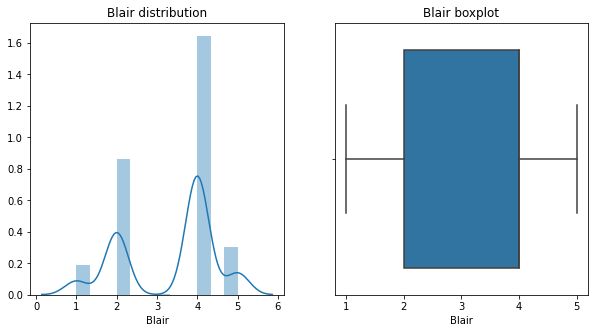

In [127]:
# plot the graph for Blair variable
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Blair distribution')
sns.distplot(df['Blair'])

plt.subplot(1,2,2)
sns.boxplot(df['Blair'])
plt.title('Blair boxplot')

In [128]:
# Labour leader Blair has received 2 and 4 score mostly.4 is the highest frequency 

Text(0.5, 1.0, 'Hague boxplot')

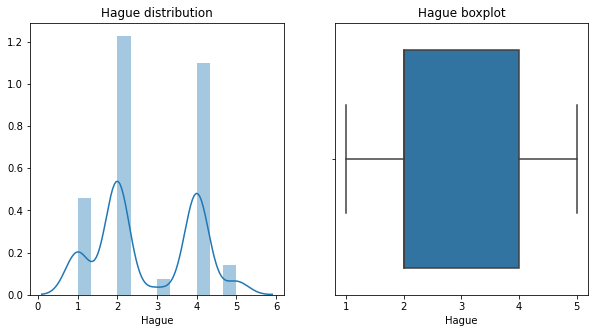

In [129]:
# plot the graph for Hauge variable
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Hague distribution')
sns.distplot(df['Hague'])

plt.subplot(1,2,2)
sns.boxplot(df['Hague'])
plt.title('Hague boxplot')

In [130]:
# Conservative Party leader Hague has received 2 and 4 score mostly.2 is the highest frequency.

Text(0.5, 1.0, 'Europe boxplot')

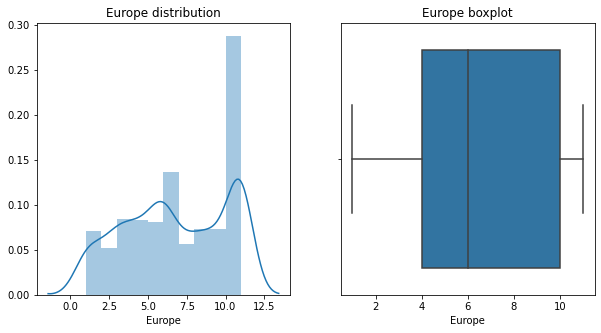

In [131]:
# plot the graph for Europe variable
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Europe distribution')
sns.distplot(df['Europe'])

plt.subplot(1,2,2)
sns.boxplot(df['Europe'])
plt.title('Europe boxplot')

In [132]:
# from the Europe plot, the 50% people has rated 4-10 it means they have Eurosceptic sentiment in increasing order.
# 10 score seems to be have Highest Frequency here, it says that most of the people are against Europe Integraation.
# Almost 25% people has given rating 10 and 11, they posses Eurosceptic sentiment.
# 1-4 is the rating given by 25% people, they seems to be with European Integration.

Text(0.5, 1.0, 'political knowledge boxplot')

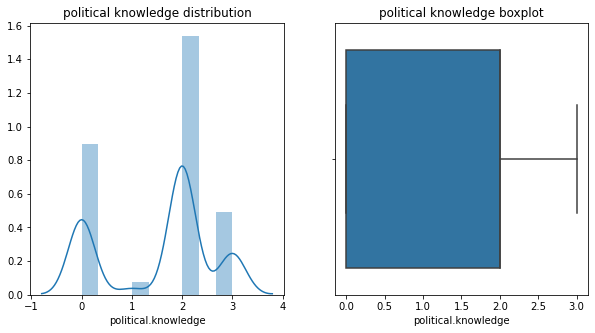

In [133]:
# plot the graph for political knowledge variable
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('political knowledge distribution')
sns.distplot(df['political.knowledge'])

plt.subplot(1,2,2)
sns.boxplot(df['political.knowledge'])
plt.title('political knowledge boxplot')

In [134]:
# Only around 25% People have average to High political knowledge, 75% people have less Political Knowledge 0,1,2.

In [135]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

### Bivariate Analysis

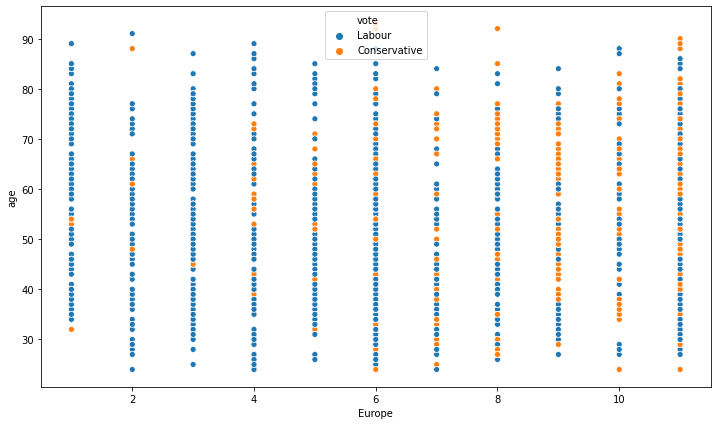

In [136]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Europe',y='age',hue='vote',data=df)

In [137]:
# Higher Europe(Eurosceptic) score,  has converted into vote to Conservative Party.

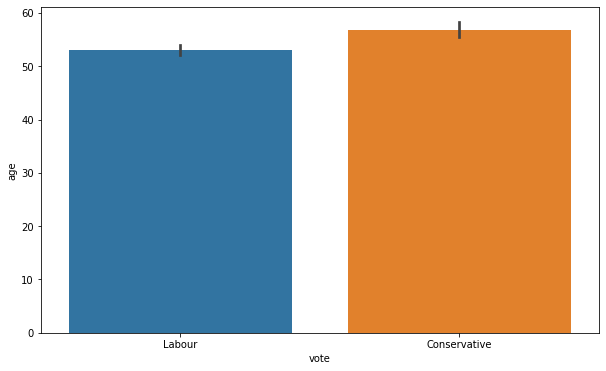

In [138]:
plt.figure(figsize=(10,6))
sns.barplot(x='vote',y='age',data=df)

In [139]:
# Almost all age groups are voting to Labour and Conservative Party.

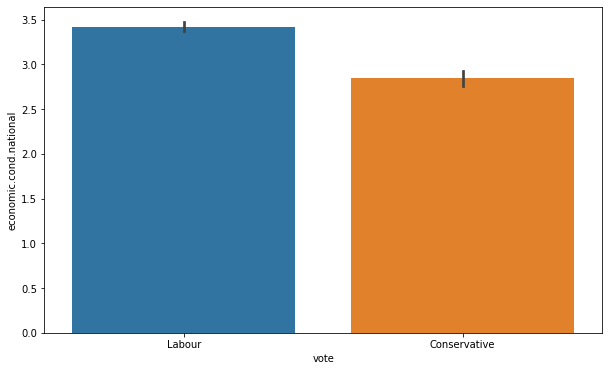

In [140]:
plt.figure(figsize=(10,6))
sns.barplot(x='vote',y='economic.cond.national',data=df)

In [141]:
# People who are giving good assesment score on National Economic condition are tend to give vote to Labour party, while lesser
# score turn into vote to Conservative party, this is not the case always happens.

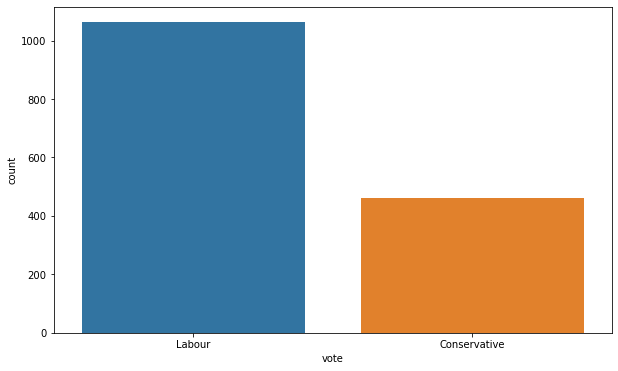

In [142]:
plt.figure(figsize=(10,6))
sns.countplot(x='vote',data=df)

In [143]:
# This data has more than 1000 readings who are voting to Labour party while less than 500 who are voting to conservative party
# it is unbalanced data, might affect to prediction of model.

In [144]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

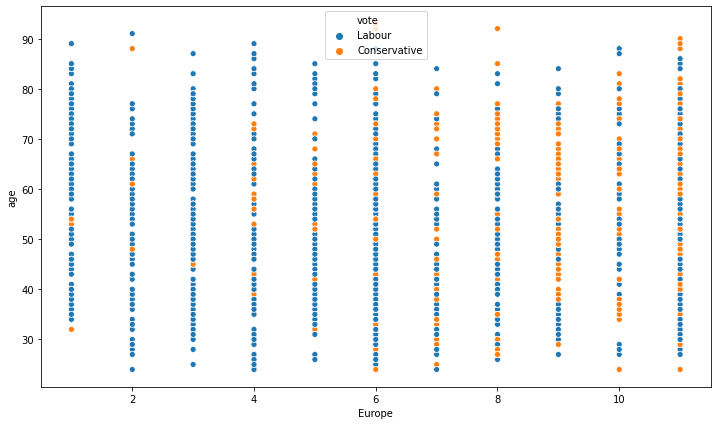

In [145]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Europe',y='age',hue='vote',data=df)

In [146]:
# All agae group people are voting to both the parties, so it is no more age specific, But EuroScepticiscm is playing important role here

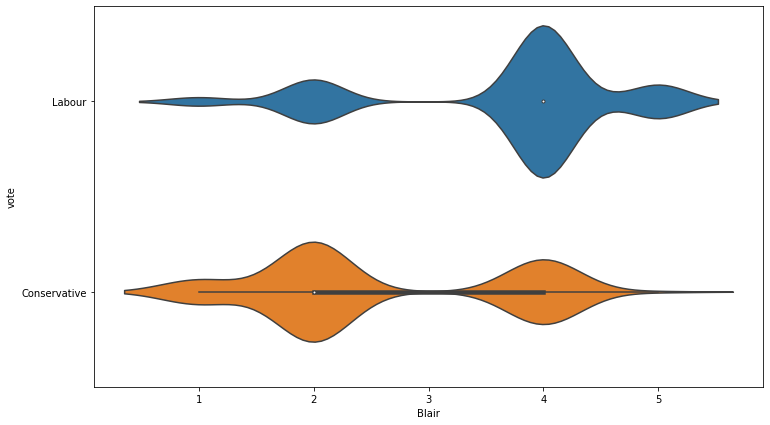

In [147]:
plt.figure(figsize=(12,7))
sns.violinplot(x='Blair',y='vote',data=df)

In [148]:
# If persons rating is high to Blair as a party leader,vote will be mostly go into Labour Party's basket. while low Blair score convert the vote into Conservative Favour.

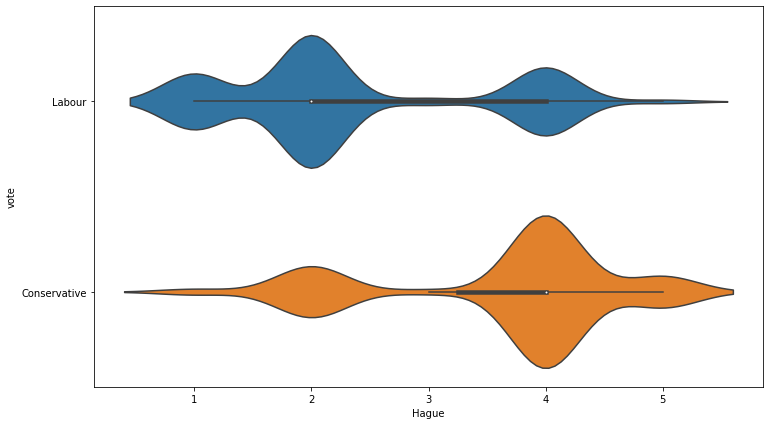

In [149]:
plt.figure(figsize=(12,7))
sns.violinplot(x='Hague',y='vote',data=df)

In [150]:
# If persons rating is high to Hague as a party leader,vote will be mostly go into Conservative Party's basket. while low Hague score convert the vote into Labour party Favour.

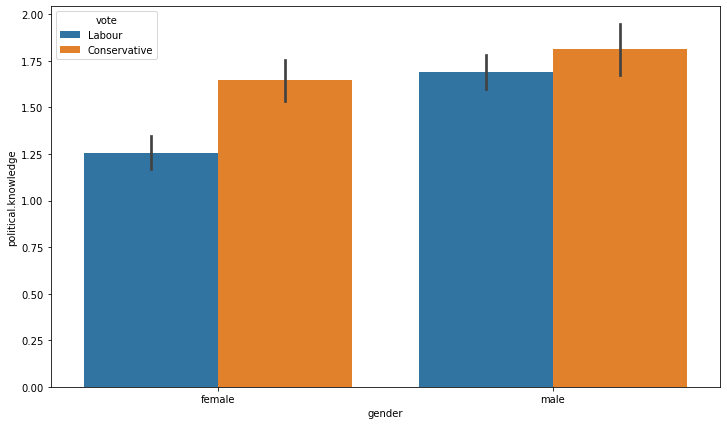

In [151]:
plt.figure(figsize=(12,7))
sns.barplot(y='political.knowledge',x='gender',hue='vote',data=df)

In [152]:
# political Knowledge of Males seems to be higher than average knowledge of females.In both cases Higher political Knowledge people are voting to Conservative Party

<Figure size 864x504 with 0 Axes>

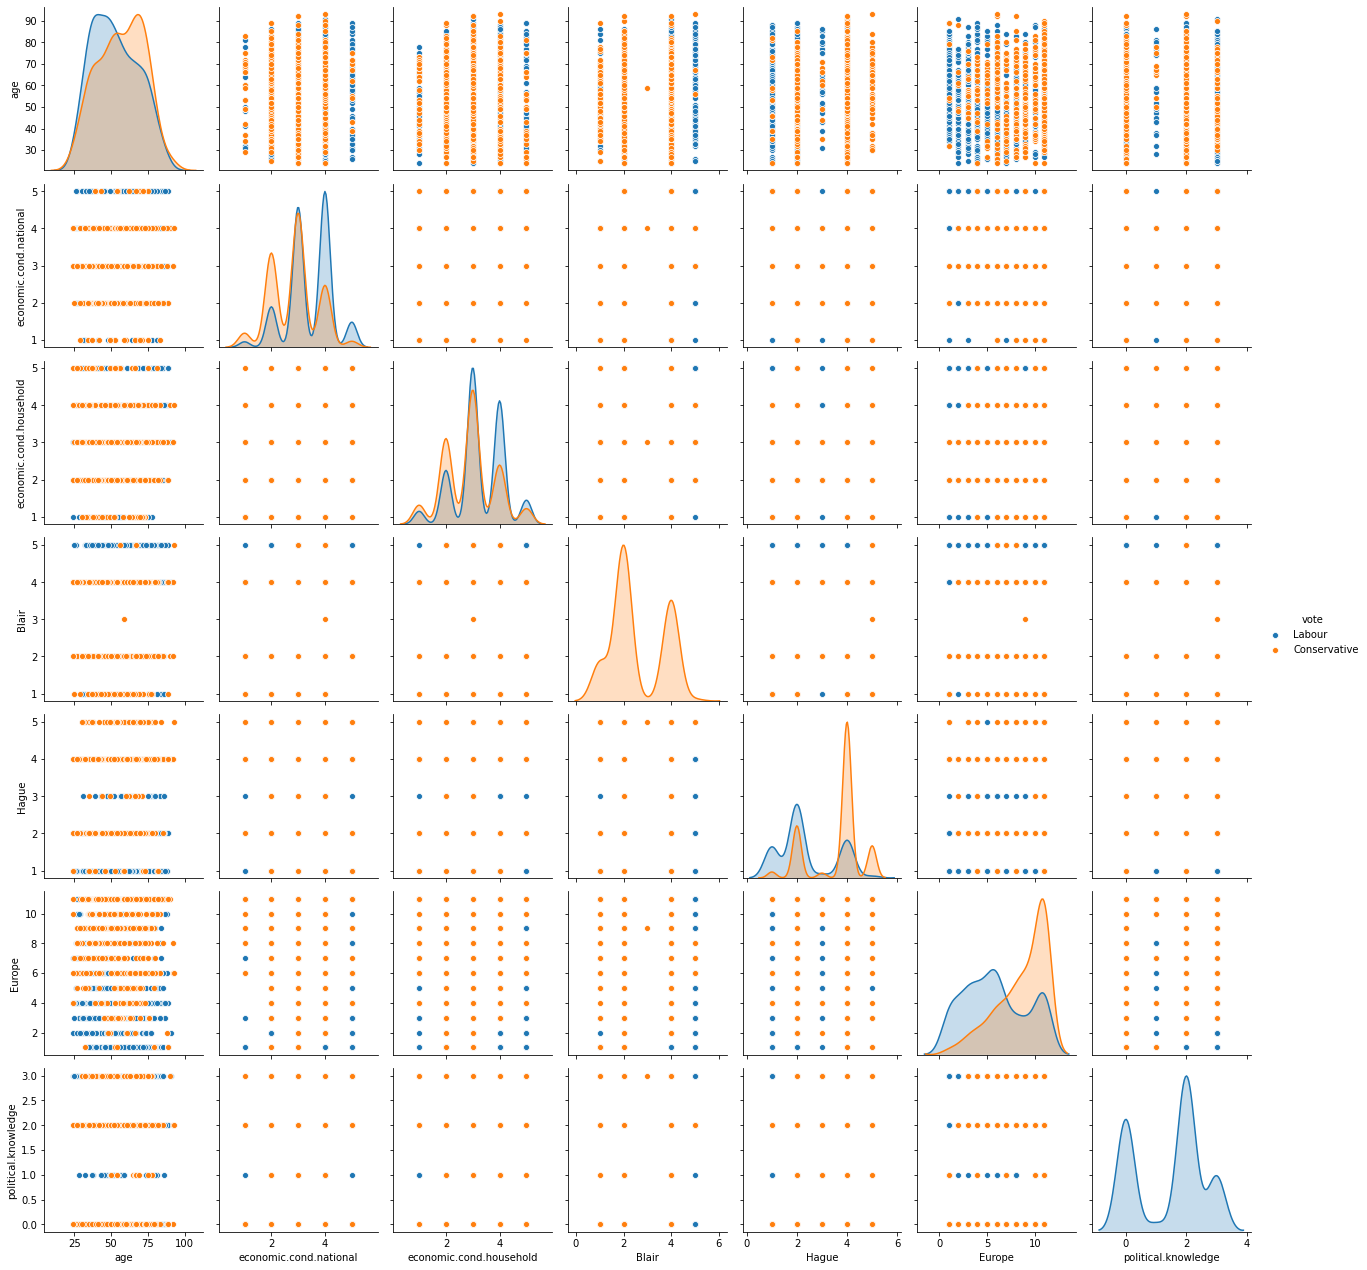

In [153]:
plt.figure(figsize=(12,7))
sns.pairplot(hue='vote',data=df)

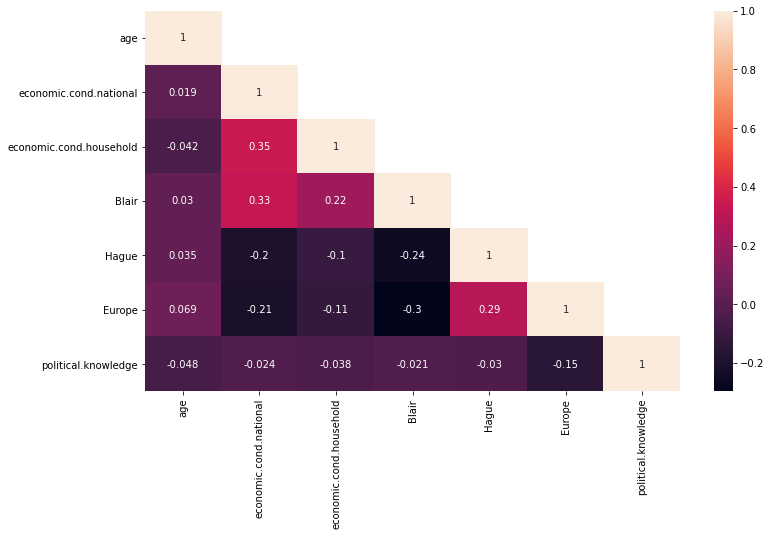

In [154]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));

In [155]:
# Blair and Economic Household Condition Rating,Economic national Condition rating shows good correlation.
# Europe and Blair are inversly related, means if Person is more Eurosceptic there will be less chances he will vote to Blair as a party leader of Labour party
# If person is giving good assesment  score to Hague he must be with Conservative party and he or she is Highly Eurosceptic.
# It is not always true, but people having good political Knowledge are preferring Europe Integration.

# Data Preparation:  

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

In [156]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [157]:
# we have to encode the features vote and Gender, to feed the data to model.
# Here vote and gender are Nominal Categorical variables, we can use one hot encoding to feed data to model.

In [158]:
df_data=pd.get_dummies(data=df, drop_first=True)

In [159]:
# Vote_labour=1 ; Vote has been given to Labour Party.
# Vote_labour=0 ; Vote has been given to Conservative Party.
# Gender=0; Female
# Gender=1; male
df_data.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


## Data Split: 

### Split the data into train and test (70:30). 

#### VIF Calculation

In [160]:
df_data.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'vote_Labour', 'gender_male'],
      dtype='object')

In [161]:
import statsmodels.formula.api as sm

In [162]:
def vif_cal(Z):
    x_var =Z
    xvar_names = Z.columns
    vif = pd.DataFrame()
    for i in range(0, xvar_names.shape[0]):
        y=x_var[xvar_names[i]]
        x = x_var[xvar_names.drop(xvar_names[i])]
        rsq =sm.ols(formula ="y~x", data =x_var).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvar_names[i], 'VIF = ' , vif)

In [163]:
vif_cal(Z= df_data[['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'vote_Labour', 'gender_male']])

age VIF =  1.03
economic.cond.national VIF =  1.28
economic.cond.household VIF =  1.16
Blair VIF =  1.34
Hague VIF =  1.32
Europe VIF =  1.28
political.knowledge VIF =  1.09
vote_Labour VIF =  1.67
gender_male VIF =  1.03


In [164]:
# All Vif score is less than 4 hence no issue of Multicollineraity.

In [165]:
# Train Test Split
# Copy all the predictor variables into X dataframe
X = df_data.drop('vote_Labour', axis=1)

# Copy target into the y dataframe. 
y = df_data['vote_Labour']

In [166]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [167]:
y_train.value_counts(1)

1    0.697282
0    0.302718
Name: vote_Labour, dtype: float64

In [168]:
y_test.value_counts(1)

1    0.696507
0    0.303493
Name: vote_Labour, dtype: float64

In [169]:
# df_data=df_data.drop('Unnamed: 0',axis=1)

In [170]:
df_data.shape

(1525, 9)

In [171]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

##### Apply Logistic Regression

In [172]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   24.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [173]:
# Predicting on Training and Test dataset
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [174]:
# Getting the Predicted Classes and Probs
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.224050,0.775950
1,0.084854,0.915146
2,0.061856,0.938144
3,0.260679,0.739321
4,0.019344,0.980656


##### Performance Metrics Logistic Regression:

In [175]:
# Accuracy - Training Data : lr_train_acc
lr_train_acc=model.score(X_train, y_train)
lr_train_acc

0.8303655107778819

AUC: 0.877


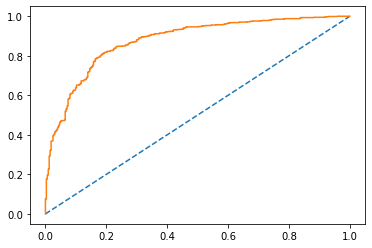

In [176]:
# AUC and ROC for the training data : lr_train_auc
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' %lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [177]:
# Accuracy - Test Data : lr_test_acc
lr_test_acc=model.score(X_test, y_test)
lr_test_acc

0.8493449781659389

AUC: 0.914


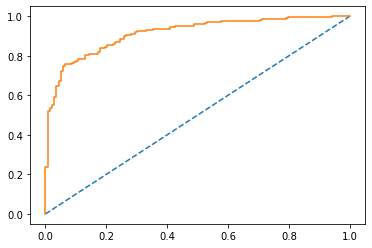

In [178]:
# AUC and ROC for the test data : lr_test_auc
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [179]:
# Confusion Matrix for the training data

In [180]:
confusion_matrix(y_train, ytrain_predict)

array([[211, 112],
       [ 69, 675]], dtype=int64)

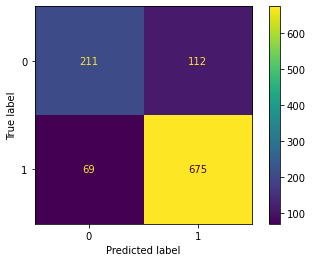

In [181]:
plot_confusion_matrix(model,X_train,y_train);

In [182]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       323
           1       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067



In [183]:
# Logistic Regression Metrics Training Data
lr_metrics_train=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics_train).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.86
lr_train_recall  0.91
lr_train_f1  0.88


In [184]:
# Confusion Matrix for test data
confusion_matrix(y_test, ytest_predict)

array([[ 94,  45],
       [ 24, 295]], dtype=int64)

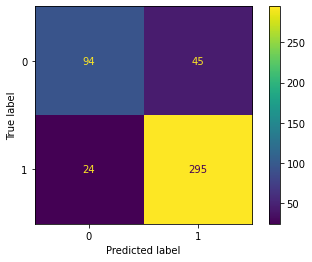

In [185]:
plot_confusion_matrix(model,X_test,y_test);

In [186]:
# Test Data Classification report for Logistic Regression
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.68      0.73       139
           1       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458



In [187]:
# Logistic Regression Test data Metrics
lr_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics_test).transpose()
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.87
lr_test_recall  0.92
lr_test_f1  0.9


##### Apply Linear Discriminant Analysis

In [188]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [189]:
# Prediction
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [190]:
# Training Data and Test Data Confusion Matrix Comparison

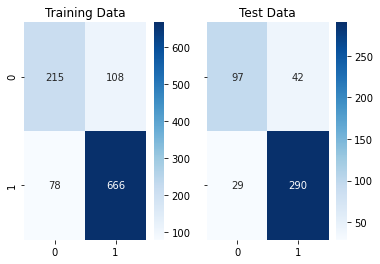

In [191]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='0.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='0.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [192]:
### Training Data and Test Data Classification Report Comparison

In [193]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.73      0.67      0.70       323
           1       0.86      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.70      0.73       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458
 



In [194]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test= model.predict_proba(X_test)

In [195]:
pred_prob_train[:,1]

array([0.93268096, 0.81409514, 0.95235391, ..., 0.93013244, 0.76926188,
       0.78866824])

AUC for the Training Data: 0.876
AUC for the Test Data: 0.915


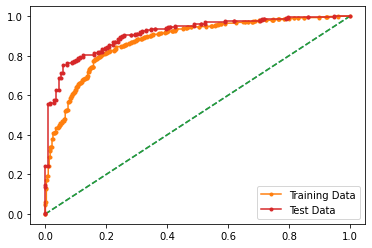

In [196]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' %lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [197]:
# Accuracy - Train Data : lda_train_acc
lda_train_acc=model.score(X_train, y_train)
lda_train_acc



0.8256794751640113

In [198]:
# Accuracy - Test Data : lda_test_acc
lda_test_acc=model.score(X_test, y_test)
lda_test_acc

0.8449781659388647

In [199]:
# LDA Metrics Training Data
lda_metrics_train=classification_report(y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics_train).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)


lda_train_precision  0.86
lda_train_recall  0.9
lda_train_f1  0.88


In [200]:
# LDA Metrics Test Data
lda_metrics_train=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics_train).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.87
lda_test_recall  0.91
lda_test_f1  0.89


In [201]:
print(lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1,lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1)

0.8303655107778819 0.8768122274376644 0.91 0.86 0.88 0.8493449781659389 0.9142554295121895 0.92 0.87 0.9


In [202]:
lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1,lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1

(0.8256794751640113,
 0.8764169080195745,
 0.9,
 0.86,
 0.88,
 0.8449781659388647,
 0.9149320042398682,
 0.91,
 0.87,
 0.89)

### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

#### KNN Model

In [203]:
df_data.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [204]:
from scipy.stats import zscore

In [205]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [206]:
# X=X.drop('Unnamed: 0',axis=1)

In [207]:
x=X.copy()

In [208]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [209]:
Y=y.copy()

In [210]:
x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender_male']]=x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender_male']].apply(zscore)


In [211]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [212]:
x.shape

(1525, 8)

In [213]:
Y.shape

(1525,)

In [214]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y, random_state=1)

In [215]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [216]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(x_train)
model_score = KNN_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8678915135608049
[[263  88]
 [ 63 729]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       351
           1       0.89      0.92      0.91       792

    accuracy                           0.87      1143
   macro avg       0.85      0.83      0.84      1143
weighted avg       0.87      0.87      0.87      1143



In [217]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(x_test)
model_score = KNN_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.824607329842932
[[ 81  30]
 [ 37 234]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       111
           1       0.89      0.86      0.87       271

    accuracy                           0.82       382
   macro avg       0.79      0.80      0.79       382
weighted avg       0.83      0.82      0.83       382



In [218]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(x_train)

# Test Data Probability Prediction
pred_prob_test= model.predict_proba(x_test)

In [219]:
pred_prob_train[:,1]

array([0.87863486, 0.99576667, 0.55725802, ..., 0.96883291, 0.99266491,
       0.91366144])

In [220]:
# y_train

AUC for the Training Data: 0.876
AUC for the Test Data: 0.888


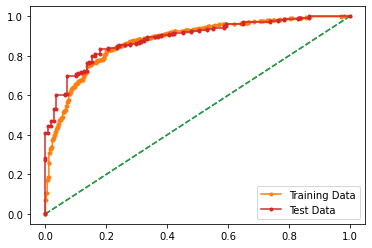

In [221]:
# AUC and ROC for the training data

# calculate AUC
knn_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' %knn_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
knn_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %knn_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

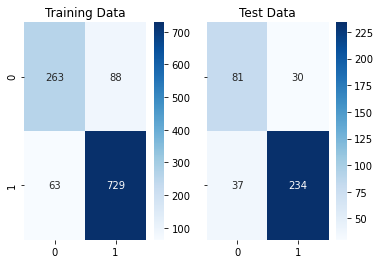

In [222]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='0.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='0.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [223]:
# Accuracy - Train Data : knn_train_acc
knn_train_acc=KNN_model.score(x_train, y_train)
knn_train_acc


0.8678915135608049

In [224]:
# Accuracy - Test Data : knn_test_acc
knn_test_acc=model.score(x_test, y_test)
knn_test_acc


0.7120418848167539

In [225]:
# KNN Metrics Training Data
knn_metrics_train=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(knn_metrics_train).transpose()
knn_train_f1=round(df.loc["1"][2],2)
knn_train_recall=round(df.loc["1"][1],2)
knn_train_precision=round(df.loc["1"][0],2)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

knn_train_precision  0.89
knn_train_recall  0.92
knn_train_f1  0.91


In [226]:
# KNN Metrics Test Data
knn_metrics_test=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(knn_metrics_test).transpose()
knn_test_f1=round(df.loc["1"][2],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_precision=round(df.loc["1"][0],2)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_test_precision  0.89
knn_test_recall  0.86
knn_test_f1  0.87


In [227]:
knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1,knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1

(0.8678915135608049,
 0.8757859938415494,
 0.92,
 0.89,
 0.91,
 0.7120418848167539,
 0.8881686114158439,
 0.86,
 0.89,
 0.87)

### Naive Bayes Model

In [228]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [229]:
X.shape

(1525, 8)

In [230]:
y.shape

(1525,)

In [231]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [232]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [233]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8219306466729147
[[223 100]
 [ 90 654]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       323
           1       0.87      0.88      0.87       744

    accuracy                           0.82      1067
   macro avg       0.79      0.78      0.79      1067
weighted avg       0.82      0.82      0.82      1067



In [234]:
y_test.value_counts()

1    319
0    139
Name: vote_Labour, dtype: int64

In [235]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8471615720524017
[[101  38]
 [ 32 287]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       139
           1       0.88      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458



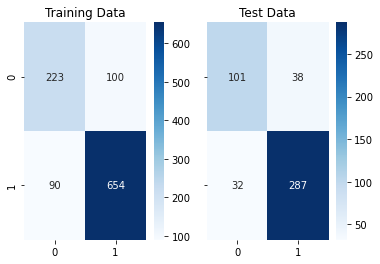

In [236]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [237]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test= model.predict_proba(X_test)

In [238]:
pred_prob_train[:,1]

array([0.93268096, 0.81409514, 0.95235391, ..., 0.93013244, 0.76926188,
       0.78866824])

In [239]:
y_train.shape

(1067,)

In [240]:
y_test.shape

(458,)

In [241]:
pred_prob_train[:,1].shape

(1067,)

In [242]:
pred_prob_test[:,1].shape

(458,)

AUC for the Training Data: 0.876
AUC for the Test Data: 0.915


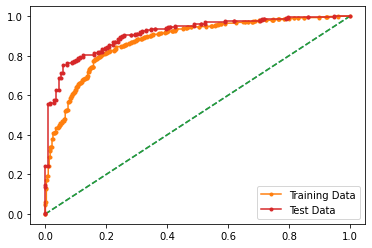

In [243]:
# AUC and ROC for the training data

# calculate AUC
NB_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' %NB_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
NB_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %NB_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [244]:
# Accuracy - Train Data : NB_train_acc
nb_train_acc=NB_model.score(X_train, y_train)
nb_train_acc

0.8219306466729147

In [245]:
# Accuracy - Test Data : nb_test_acc
nb_test_acc=NB_model.score(X_test, y_test)
nb_test_acc

0.8471615720524017

In [246]:
# NB Metrics Training Data
nb_metrics_train=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(nb_metrics_train).transpose()
nb_train_f1=round(df.loc["1"][2],2)
nb_train_recall=round(df.loc["1"][1],2)
nb_train_precision=round(df.loc["1"][0],2)
print ('nb_train_precision ',nb_train_precision)
print ('nb_train_recall ',nb_train_recall)
print ('nb_train_f1 ',nb_train_f1)

nb_train_precision  0.87
nb_train_recall  0.88
nb_train_f1  0.87


In [247]:
# NB Metrics Test Data
nb_metrics_test=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(nb_metrics_test).transpose()
nb_test_f1=round(df.loc["1"][2],2)
nb_test_recall=round(df.loc["1"][1],2)
nb_test_precision=round(df.loc["1"][0],2)
print ('nb_test_precision ',nb_test_precision)
print ('nb_test_recall ',nb_test_recall)
print ('nb_test_f1 ',nb_test_f1)

nb_test_precision  0.88
nb_test_recall  0.9
nb_test_f1  0.89


In [248]:
nb_train_acc,NB_train_auc,nb_train_recall,nb_train_precision,nb_train_f1,nb_test_acc,NB_test_auc,nb_test_recall,nb_test_precision,nb_test_f1

(0.8219306466729147,
 0.8764169080195745,
 0.88,
 0.87,
 0.87,
 0.8471615720524017,
 0.9149320042398682,
 0.9,
 0.88,
 0.89)

###  1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks) 

## Random forest

In [249]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [250]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [251]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[322   1]
 [  0 744]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       744

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [252]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8493449781659389
[[ 94  45]
 [ 24 295]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       139
           1       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458



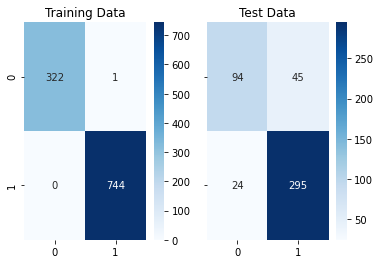

In [253]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [254]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test= model.predict_proba(X_test)

In [255]:
pred_prob_train[:,1]

array([0.93268096, 0.81409514, 0.95235391, ..., 0.93013244, 0.76926188,
       0.78866824])

In [256]:
pred_prob_test[:,1]

array([0.80179659, 0.94095624, 0.94756973, 0.74977724, 0.98570791,
       0.95480524, 0.88467309, 0.97059106, 0.97185689, 0.52033766,
       0.03440019, 0.9811587 , 0.91371025, 0.99337041, 0.50516291,
       0.58609344, 0.9689345 , 0.98807731, 0.96671653, 0.8095467 ,
       0.96900688, 0.02403175, 0.93869193, 0.97438084, 0.03604399,
       0.96003165, 0.97938841, 0.66427906, 0.18103523, 0.10445571,
       0.98538308, 0.95895037, 0.36543875, 0.98437848, 0.77931974,
       0.95679214, 0.98572807, 0.86257832, 0.14211549, 0.76595619,
       0.04229451, 0.96847138, 0.7594737 , 0.77620832, 0.91981234,
       0.13805355, 0.44671147, 0.8689937 , 0.6654688 , 0.93457394,
       0.58839499, 0.27395577, 0.0407067 , 0.15501582, 0.77200048,
       0.53776934, 0.96480957, 0.27137284, 0.94420832, 0.86735875,
       0.82844567, 0.95070802, 0.16800846, 0.47009569, 0.96435269,
       0.80693534, 0.97989796, 0.99204734, 0.85065304, 0.10887309,
       0.88185789, 0.25583169, 0.49936696, 0.39939447, 0.92468

AUC for the Training Data: 0.876
AUC for the Test Data: 0.915


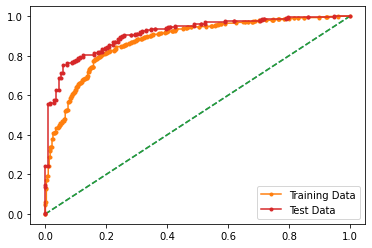

In [257]:
# AUC and ROC for the training data

# calculate AUC
rf_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' %rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
rf_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [258]:
# Accuracy - Train Data : NB_train_acc
rf_train_acc=RF_model.score(X_train, y_train)
rf_train_acc

0.9990627928772259

In [259]:
# Accuracy - Test Data : knn_train_acc
rf_test_acc=RF_model.score(X_test, y_test)
rf_test_acc

0.8493449781659389

In [260]:
# Random Forest Metrics Training Data
rf_metrics_train=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(rf_metrics_train).transpose()
rf_train_f1=round(df.loc["1"][2],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_precision=round(df.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  1.0
rf_train_recall  1.0
rf_train_f1  1.0


In [261]:
# Random Forest Metrics Test Data
rf_metrics_test=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(rf_metrics_test).transpose()
rf_test_f1=round(df.loc["1"][2],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_precision=round(df.loc["1"][0],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.87
rf_test_recall  0.92
rf_test_f1  0.9


In [262]:
rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1,rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1

(0.9990627928772259,
 0.8764169080195745,
 1.0,
 1.0,
 1.0,
 0.8493449781659389,
 0.9149320042398682,
 0.92,
 0.87,
 0.9)

### Bagging

In [263]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [265]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

In [266]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.971883786316776
[[298  25]
 [  5 739]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       323
           1       0.97      0.99      0.98       744

    accuracy                           0.97      1067
   macro avg       0.98      0.96      0.97      1067
weighted avg       0.97      0.97      0.97      1067



In [267]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8427947598253275
[[ 93  46]
 [ 26 293]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       139
           1       0.86      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.79      0.81       458
weighted avg       0.84      0.84      0.84       458



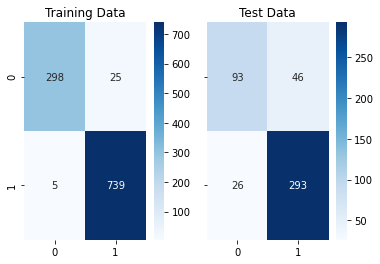

In [270]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [287]:
# Training Data Probability Prediction
pred_prob_train = Bagging_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test= Bagging_model.predict_proba(X_test)

AUC for the Training Data: 0.997
AUC for the Test Data: 0.918


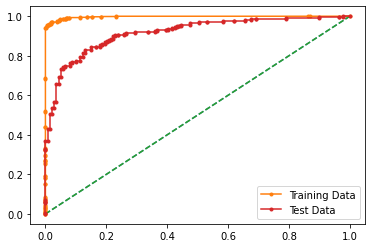

In [288]:
# AUC and ROC for the training data

# calculate AUC
bag_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' %bag_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
bag_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %bag_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Ada Boost

In [275]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [276]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8444236176194939
[[227  96]
 [ 70 674]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       323
           1       0.88      0.91      0.89       744

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [277]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8362445414847162
[[ 94  45]
 [ 30 289]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.71       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.81      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458



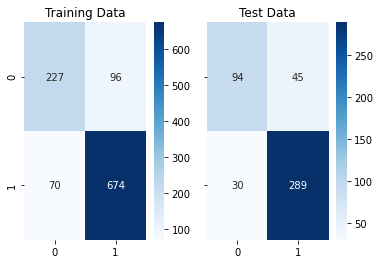

In [278]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [279]:
# Training Data Probability Prediction
pred_prob_train = ADB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test= ADB_model.predict_proba(X_test)

AUC for the Training Data: 0.902
AUC for the Test Data: 0.906


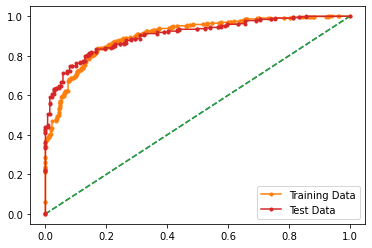

In [280]:
# AUC and ROC for the training data

# calculate AUC
adb_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' %adb_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
adb_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %adb_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [281]:
# Accuracy - Train Data : NB_train_acc
adb_train_acc=ADB_model.score(X_train, y_train)
adb_train_acc

0.8444236176194939

In [282]:
# Accuracy - Test Data : knn_train_acc
adb_test_acc=ADB_model.score(X_test, y_test)
adb_test_acc

0.8362445414847162

In [298]:
# Ada Boost Metrics Training Data
adb_metrics_train=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(adb_metrics_train).transpose()
adb_train_f1=round(df.loc["1"][2],2)
adb_train_recall=round(df.loc["1"][1],2)
adb_train_precision=round(df.loc["1"][0],2)
print ('Predict 1:adb_train_precision ',adb_train_precision)
print ('Predict 1:adb_train_recall ',adb_train_recall)
print ('Predict 1:adb_train_f1 ',adb_train_f1)

Predict 1:adb_train_precision  0.88
Predict 1:adb_train_recall  0.91
Predict 1:adb_train_f1  0.89


In [299]:
adb_train_f1_0=round(df.loc["0"][2],2)
adb_train_recall_0=round(df.loc["0"][1],2)
adb_train_precision_0=round(df.loc["0"][0],2)
print ('Predict 0:adb_train_precision ',adb_train_precision_0)
print ('Predict 0:adb_train_recall ',adb_train_recall_0)
print ('Predict 0:adb_train_f1 ',adb_train_f1_0)

Predict 0:adb_train_precision  0.76
Predict 0:adb_train_recall  0.7
Predict 0:adb_train_f1  0.73


In [301]:
# Ada Boost Metrics Test Data
adb_metrics_test=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(adb_metrics_test).transpose()
adb_test_f1=round(df.loc["1"][2],2)
adb_test_recall=round(df.loc["1"][1],2)
adb_test_precision=round(df.loc["1"][0],2)
print ('Predict 1:adb_test_precision ',adb_test_precision)
print ('Predict 1:adb_test_recall ',adb_test_recall)
print ('Predict 1:adb_test_f1 ',adb_test_f1)

Predict 1:adb_test_precision  0.87
Predict 1:adb_test_recall  0.91
Predict 1:adb_test_f1  0.89


In [303]:
# Ada Boost Metrics Test Data
adb_metrics_test=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(adb_metrics_test).transpose()
adb_test_f1_0=round(df.loc["0"][2],2)
adb_test_recall_0=round(df.loc["0"][1],2)
adb_test_precision_0=round(df.loc["0"][0],2)
print ('Predict 0:adb_test_precision ',adb_test_precision_0)
print ('Predict 0:adb_test_recall ',adb_test_recall_0)
print ('Predict 0:adb_test_f1 ',adb_test_f1_0)

Predict 0:adb_test_precision  0.76
Predict 0:adb_test_recall  0.68
Predict 0:adb_test_f1  0.71


In [285]:
adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1,adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1

(0.8444236176194939,
 0.9023623456173641,
 0.91,
 0.88,
 0.89,
 0.8362445414847162,
 0.9058207979071289,
 0.91,
 0.87,
 0.89)

### 1.7.2 Final Model: Compare all the model and write an inference which model is best/optimized.

##### Comparison of the performance metrics from the 6 models

In [306]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logit Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'Logit Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
       'KNN Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'Naive Bayes Train':[nb_train_acc,NB_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'Naive Bayes Test':[nb_test_acc,NB_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
         'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
         'Ada Boost Train':[adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1],
        'Ada Boost Test':[adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1],
        'Ada Boost Train_0':[adb_train_acc,adb_train_auc,adb_train_recall_0,adb_train_precision_0,adb_train_f1_0],
        'Ada Boost Test_0':[adb_test_acc,adb_test_auc,adb_test_recall_0,adb_test_precision_0,adb_test_f1_0]
        
                    
                    
                    
                    
                    },index=index)
round(data,2)

,Logit Train,Logit Test,LDA Train,LDA Test,KNN Train,KNN Test,Naive Bayes Train,Naive Bayes Test,RF Train,RF Test,Ada Boost Train,Ada Boost Test,Ada Boost Train_0,Ada Boost Test_0
Accuracy,0.83,0.85,0.83,0.84,0.87,0.71,0.82,0.85,1.00,0.85,0.84,0.84,0.84,0.84
AUC,0.88,0.91,0.88,0.91,0.88,0.89,0.88,0.91,0.88,0.91,0.90,0.91,0.90,0.91
Recall,0.91,0.92,0.90,0.91,0.92,0.86,0.88,0.90,1.00,0.92,0.70,0.91,0.70,0.68
Precision,0.86,0.87,0.86,0.87,0.89,0.89,0.87,0.88,1.00,0.87,0.76,0.87,0.76,0.76
F1 Score,0.88,0.90,0.88,0.89,0.91,0.87,0.87,0.89,1.00,0.90,0.73,0.89,0.73,0.71


### Conclusion

#### So we will select models which have performed approximately similar on the train and test data set and apply smote on the same to check if the performance has improved or not i.e. Naive Bayes and KNN

 #### SMOTE 

In [177]:
pip install imbalanced-learn

In [178]:
from imblearn.over_sampling import SMOTE

##### SMOTE is only applied on the train data set

In [179]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [180]:
## Let's check the shape after SMOTE
X_train_res.shape

(1488, 8)

In [181]:
y_train_res.value_counts(normalize =True)

1    0.5
0    0.5
Name: vote_Labour, dtype: float64

### Naive Bayes with SMOTE

In [182]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [183]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [184]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8131720430107527
[[595 149]
 [129 615]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       744
           1       0.80      0.83      0.82       744

    accuracy                           0.81      1488
   macro avg       0.81      0.81      0.81      1488
weighted avg       0.81      0.81      0.81      1488



In [185]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8427947598253275
[[109  30]
 [ 42 277]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       139
           1       0.90      0.87      0.88       319

    accuracy                           0.84       458
   macro avg       0.81      0.83      0.82       458
weighted avg       0.85      0.84      0.84       458



#### SMOTE dataset - ADA BOOST

In [186]:
ADB_SM_model = AdaBoostClassifier(n_estimators=50, random_state=1, base_estimator = NB_SM_model, learning_rate=0.01)
ADB_SM_model.fit(X_train_res, y_train_res)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=0.01,
                   random_state=1)

In [187]:
y_train_predict_res = ADB_SM_model.predict(X_train_res)
model_score = ADB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res,y_train_predict_res))
print(metrics.classification_report(y_train_res,y_train_predict_res))

0.8145161290322581
[[601 143]
 [133 611]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       744
           1       0.81      0.82      0.82       744

    accuracy                           0.81      1488
   macro avg       0.81      0.81      0.81      1488
weighted avg       0.81      0.81      0.81      1488



In [188]:
y_test_predict_res = ADB_SM_model.predict(X_test)
model_score =ADB_SM_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict_res))
print(metrics.classification_report(y_test,y_test_predict_res))

0.8362445414847162
[[110  29]
 [ 46 273]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       139
           1       0.90      0.86      0.88       319

    accuracy                           0.84       458
   macro avg       0.80      0.82      0.81       458
weighted avg       0.84      0.84      0.84       458



#### SMOTE dataset - Logistic Regression


In [189]:
# Fit the Logistic Regression model
lr_sm_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
lr_sm_model.fit(X_train_res, y_train_res)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [190]:
y_train_predict_res = lr_sm_model.predict(X_train_res)
model_score = lr_sm_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res,y_train_predict_res))
print(metrics.classification_report(y_train_res,y_train_predict_res))

0.821236559139785
[[611 133]
 [133 611]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       744
           1       0.82      0.82      0.82       744

    accuracy                           0.82      1488
   macro avg       0.82      0.82      0.82      1488
weighted avg       0.82      0.82      0.82      1488



In [191]:
y_test_predict_res = lr_sm_model.predict(X_test)
model_score =lr_sm_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict_res))
print(metrics.classification_report(y_test,y_test_predict_res))

0.8362445414847162
[[114  25]
 [ 50 269]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       139
           1       0.91      0.84      0.88       319

    accuracy                           0.84       458
   macro avg       0.81      0.83      0.82       458
weighted avg       0.85      0.84      0.84       458



### Model tuning

1. KNN. Tuning is to choose the best k value, distance, and weights

2. Naive Bayes: Prior Probabilities

3. Logistic Regression: Different Solvers, C values, and regularization parameters

4. LDA: Prior Probabilities, Different algorithms

#### For Naive Bayes Model, to improve performance we will use K-fold validation

In [193]:
from sklearn.model_selection import cross_val_score,cross_val_predict
scores = cross_val_score(NB_model,X_train, y_train, cv =10)
print("Cross Validation Score:", scores,scores)
print("Average Score:", np.average(scores))

Cross Validation Score: [0.82242991 0.8411215  0.81308411 0.81308411 0.81308411 0.82242991
 0.79439252 0.87735849 0.81132075 0.81132075] [0.82242991 0.8411215  0.81308411 0.81308411 0.81308411 0.82242991
 0.79439252 0.87735849 0.81132075 0.81132075]
Average Score: 0.8219626168224299


In [ ]:
# Looking at Recalls, Training accuracy and Test accuracy. Model seems to be performing well

#### Lets check using GRID search, for KNN

In [199]:
params = {'n_neighbors':[2,4,6,8,10,12,14,16,18],
         'algorithm': ['auto','ball_tree','kd_tree','brute'],
         'leaf_size':list(range(1,30)),
         'p':[1,2],
         'metric':['minkowski','euclidean','manhattan','chebyshev', 'mahanalobis']}

In [216]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y, random_state=1)

In [217]:
x_train

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1101,0.497751,-0.279218,-0.150948,-1.136225,1.831354,0.385710,-1.424148,1.067169
1083,-0.902983,-0.279218,0.924730,0.566716,-1.419886,-1.131070,1.346038,1.067169
772,-0.138946,-1.414704,-0.150948,-1.136225,1.831354,1.295778,0.422643,-0.937059
700,-0.457295,-0.279218,-0.150948,0.566716,-0.607076,-0.827714,-1.424148,-0.937059
27,-0.202616,-0.279218,-1.226625,0.566716,-0.607076,-1.434426,0.422643,-0.937059
...,...,...,...,...,...,...,...,...
715,0.816100,0.856268,-0.150948,1.418187,-0.607076,-1.434426,0.422643,1.067169
905,-1.730689,1.991754,2.000408,-1.136225,-1.419886,-0.827714,1.346038,1.067169
1096,-1.285001,0.856268,2.000408,0.566716,1.018544,0.082354,0.422643,-0.937059
235,-1.157661,0.856268,0.924730,0.566716,-0.607076,0.082354,0.422643,-0.937059


In [201]:
%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params, refit=True,verbose=1)
grid_knn.fit(x_train, y_train)

Fitting 5 folds for each of 10440 candidates, totalling 52200 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev', 'mahanalobis'],
                         'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'p': [1, 2]},
             verbose=1)

In [202]:
grid_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 16,
 'p': 2}

In [203]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,roc_curve

print("Train Accuracy is :{}".format(accuracy_score(y_train,grid_knn.predict(x_train))))
print("\nTest Accuracy is :{}".format(accuracy_score(y_test,grid_knn.predict(x_test))))

Train Accuracy is :0.8433945756780402

Test Accuracy is :0.8272251308900523


In [204]:
from sklearn.metrics import classification_report
print("Classification report for Train set:")
print(classification_report(y_train,grid_knn.predict(x_train)))

Classification report for Train set:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       351
           1       0.88      0.90      0.89       792

    accuracy                           0.84      1143
   macro avg       0.82      0.81      0.81      1143
weighted avg       0.84      0.84      0.84      1143



In [205]:
print("Classification report for Test set:")
print(classification_report(y_test,grid_knn.predict(x_test)))

Classification report for Test set:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       111
           1       0.89      0.86      0.88       271

    accuracy                           0.83       382
   macro avg       0.79      0.80      0.79       382
weighted avg       0.83      0.83      0.83       382



#### Lets check using GRID search, for Logistic Regression and Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])


# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [37]:
best_clf.best_params_

{'classifier': LogisticRegression(C=11.288378916846883, solver='liblinear'),
 'classifier__C': 11.288378916846883,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

In [38]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,roc_curve

print("Train Accuracy is :{}".format(accuracy_score(y_train,best_clf.predict(X_train))))
print("\nTest Accuracy is :{}".format(accuracy_score(y_test,best_clf.predict(X_test))))

Train Accuracy is :0.8294283036551078

Test Accuracy is :0.8493449781659389


In [40]:
from sklearn.metrics import classification_report
print("Classification report for Train set:")
print(classification_report(y_train,best_clf.predict(X_train)))

Classification report for Train set:
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       323
           1       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067



In [84]:
print("Classification report for Test set:")
print(classification_report(y_test,best_clf.predict(X_test)))

Classification report for Test set:
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       139
           1       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458



In [327]:
t=best_clf.predict(X_test)[0:400]

In [328]:
unique, counts = np.unique(t, return_counts=True)
dict(zip(unique, counts))
# {0: 7, 1: 4, 2: 1, 3: 2, 4: 1}

{0: 96, 1: 304}

### 1.8 Based on these predictions, what are the insights? 

##### Summary:
In this Case study we have to decide strategy or plan or we have to predict which party will win election, To which party particular person will vote. What are the deciding factors to win election that we are studying here.
Survey is Conducted on 1525 different people, where features like Age, whether person is Eurosceptic with ratings, Assessment to both leaders Hague and Blair. Person is having political Knowledge or not. what is public opinion on Household and national economy, their gender is also taken into consideration, so it seems we have sufficient features to
evaluate result.


##### Steps Performed and Insights:

To predict results, we have started with Exploratory data Analysis where we got some hidden insights by looking at Dataset,
by using univariate analysis, Multivariate analysis. Null value, Outlier detection.From EDA we have drawn below mentioned Insights:

Assesment to leader Blair and Economic Household Condition Rating,Economic national Condition rating shows good correlation.

Europscepticism score and Blair Assesment score are inversly related, means if Person is more Eurosceptic there will be less chances he will vote to Blair as a party leader of Labour party.

If person is giving good assesment score to Hague he must be with Conservative party and he or she is Highly Eurosceptic.

It is not always true, but people having good political Knowledge are preferring Europe Integration.

##### Modelling

As the target variable here is Categorcal i.e Conservative and Labour, we can use Logistic Regression,LDA,KNN,Naive Bayes, RF,Bagging,Boosting.

After all this we have created a Final Classification report where all performance metrics are mentioned.

We have used all mentioned Algorithms. If we check the Target Variable we have almost 70% data of Labour Party and 30 % Conservative Party. We have built all algorithms on this data first, after this we have used SMOTE technique of Oversampling to balance Imbalanced data. We can see in the Classification report that Accuracy, Precision has been dropped.

After all this to do Model tunning we have used Gridsearch CV,K fold cross validation to Improve performance of Existing Base models.

##### Results:

To get the crystal clear picture, we need more data points to avoid Imbalance data issue. but from this data, we can say that to win the election one must be with vision Europe integration, as this vision has helped labour party.

The Model Logistic Regression has good score and seems to be very stable model in this Scenario.If we predict on
Test Data, The labour Party seems to be get Higher number of Votes as compare to Conservative Party.
Again the question arises here does this sample represent the whole nation, any bias in the data, like from Particular region data is collected where Labour Party has higher influence.
There are less votes to Conservative party,but again it needs more data to predict correct results. 
But as of now this data tells us that Labour party will win this elections.


